In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression 
from sklearn.linear_model import LinearRegression

In [4]:
def plot(X, y, color="b."):
    plt.figure()
    plt.plot(X, y, color)
    plt.show()
    plt.close()

In [5]:
X, y = make_regression(n_samples=100, n_features=1, noise=3, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression().fit(X_train, y_train)

y_hat = model.predict(X_test)

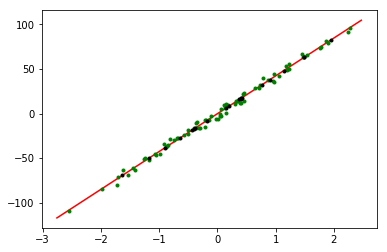

In [6]:
plt.figure()

min_x = min(X) - 0.2
max_x = max(X) + 0.2

regression_line = [min_x, max_x]


plt.plot(regression_line, model.predict(regression_line), "r-")

plt.plot(X_train, y_train, "g.", label="Train set")
plt.plot(X_test, y_hat, "k.", label="predict set")

plt.show()
plt.close()

In [7]:
print "MSE:\t\t", np.mean((y_test - y_hat) ** 2)

print "Variance score:", model.score(X_test, y_test)

MSE:		8.743251050718426
Variance score: 0.9941338336260228


In [8]:
def update_weights(y, y_hat, x):
    error = y - y_hat
    for degree in range(len(W)):
        W[degree] += alpha * error * pow(x, degree)
    errors.append(abs(error))
        
def predict(x):
    return sum([W[degree] * pow(x, degree) for degree in range(len(W))])

def predict_arr(X):
    return [predict(x) for x in X]

def get_avg_error(X, y):
    return abs(sum(sum(predict(X) - y)) / M)

def update_error(X, y):
    E.append(get_avg_error(X, y))
    error_index.append(E[-1])

In [9]:
def plot_model_and_input():
    ## DATA PLOT
    plt.figure()
    plt.plot(X_train, y_train, "b.", label="train")
    plt.plot(X_train, predict_arr(X_train), "r.", label="prediction")
    plt.legend()
    plt.show()
    plt.close()

    ## ERROR PLOT
    plt.figure()
    plt.plot(range(len(errors)), errors)
    plt.show()
    plt.close()

In [10]:
alpha = 0.01

degree = 2
W = np.zeros(degree + 1)

M = len(X)
M_train = len(X_train)
errors = []
epsilon = 0.1


errors.append(epsilon+1)
counter = M_train

USE_FOR = False
    
if USE_FOR:
    for i in range(M*10):
        index = i % M_train
        x = X_train[index]
        y = y_train[index]

        y_hat = predict(x)
        update_weights(y, y_hat, x)
else:
    
    index = 0
    epsilon = 0.02
    while counter > 0:
        if errors[-1] > epsilon:
            counter = M_train

            x = X_train[index]
            y = y_train[index]

            y_hat = predict(x)
            update_weights(y, y_hat, x)
        else:
            counter -= 1


        index = (index + 1) % M_train

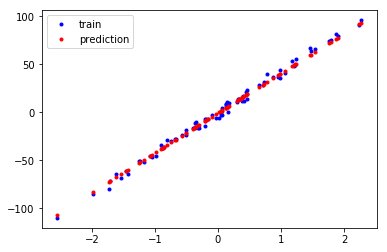

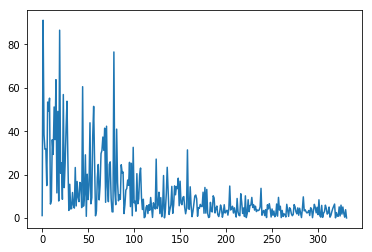

In [11]:
plot_model_and_input()

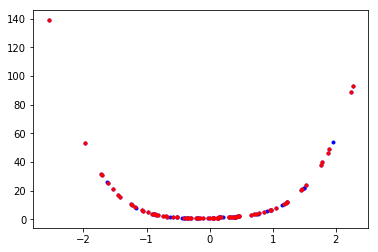

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures

X, y = make_regression(n_samples=100, n_features=1, noise=3, random_state=0)
y = 1 + X + 2*X*X + 3 * X* X* X* X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

plt.figure()
plt.plot(X, y, "b.")
plt.plot(X_train, y_train, "r.")
plt.show()

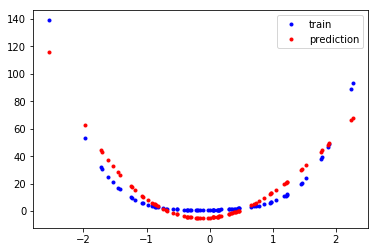

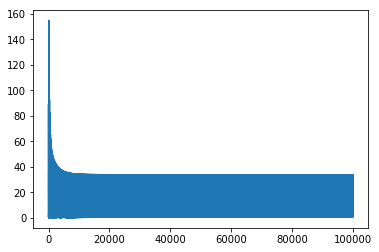

[array([22.36626202]), array([9.76293646]), array([0.63000855]), array([0.4888449]), array([5.68613052]), array([6.97451677]), array([3.42132351]), array([6.87972136]), array([5.81002124]), array([5.05682859]), array([1.56995985]), array([4.86641577]), array([7.69774723]), array([9.77961916]), array([10.13715008]), array([3.22524053]), array([10.70783737]), array([2.60397296]), array([7.92097234]), array([1.63969674]), array([6.57315572]), array([3.59654068]), array([11.01458693]), array([2.44642618]), array([1.59453934]), array([9.29204632]), array([6.09004755]), array([7.59909363]), array([5.55772673]), array([1.91188399]), array([5.74730596]), array([5.80811509]), array([5.00384284]), array([5.69387434]), array([5.07154124]), array([1.96526462]), array([5.11737777]), array([1.62237601]), array([3.48134558]), array([1.5764369]), array([3.64272816]), array([2.86357076]), array([5.77325435]), array([10.7836121]), array([5.49188274]), array([5.33504837]), array([4.23491264]), array([5.8

In [33]:
alpha = 0.001

M_train = len(X_train)
errors = []
epsilon = 0.0001
MAX_ITER = 100000

degree = 3
W = np.zeros(degree + 1)

errors.append(epsilon+1)
counter = M_train

USE_FOR = False

if USE_FOR:
    for i in range(M*10):
        index = i % M_train
        x = X_train[index]
        y = y_train[index]

        y_hat = predict(x)
        update_weights(y, y_hat, x)
else:
    index = 0
    iteration = 0
    while counter > 0 and iteration < MAX_ITER:
        if errors[-1] > epsilon:
            counter = M_train

            x = X_train[index]
            y = y_train[index]

            y_hat = predict(x)
            W_temp = W.copy()
            try:
                update_weights(y, y_hat, x)
                if math.isinf(W[0]):
                    raise Exception("boh")
            except:
                W = W_temp
                counter = 0
        else:
            counter -= 1
        
        iteration += 1
        index = (index + 1) % M_train
        
plot_model_and_input()
print errors[-M_train:]